   Year  No of Accidents  Derailments  Collisions  Collisions at LC  \
0  2016               37           15           9                11   
1  2017               15           10           1                 4   
2  2018               18           13           2                 3   
3  2019               25           14           2                 8   
4  2020               19            8           4                 7   
5  2021               22           14           1                 5   

   Fire Accidents  Overshooting  
0               1             1  
1               0             0  
2               0             0  
3               1             0  
4               0             0  
5               1             1  
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        0
Model Family:              

C:\Users\Nasar\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:804: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
C:\Users\Nasar\anaconda3\lib\site-packages\statsmodels\regression\_tools.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid
C:\Users\Nasar\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:775: RuntimeWarning: divide by zero encountered in log
  ll_obs = weight_scale * np.log(weight_scale * endog_mu)
C:\Users\Nasar\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:775: RuntimeWarning: invalid value encountered in multiply
  ll_obs = weight_scale * np.log(weight_scale * endog_mu)


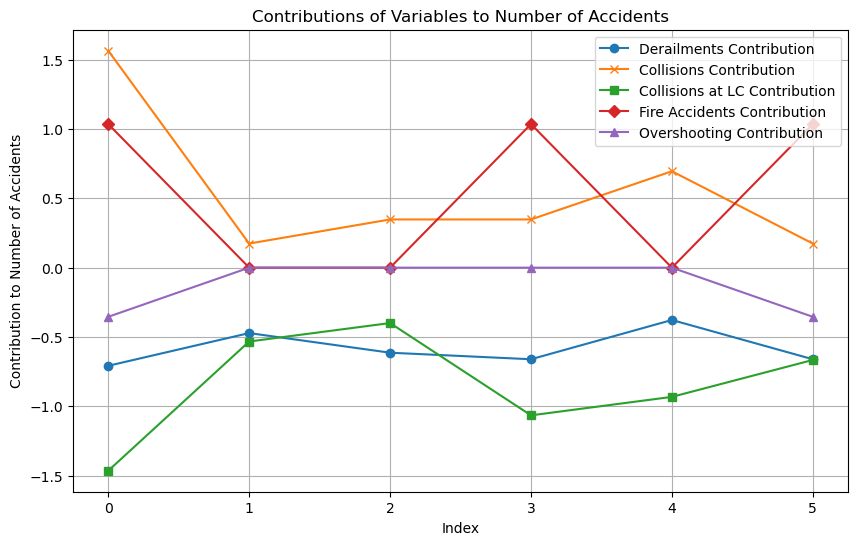

In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load and prepare the data
file_path = 'combined.xlsx'
sheet_name = 'Accident Types'
df = pd.read_excel(file_path, sheet_name=sheet_name)
df = df.fillna(method='ffill')
print(df)
# Define the independent (predictor) and dependent (response) variables
X = df[['Derailments', 'Collisions', 'Collisions at LC', 'Fire Accidents', 'Overshooting']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with a Gamma distribution and log link function
glm_gamma = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log()))
glm_gamma_results = glm_gamma.fit()

# Print the summary
print(glm_gamma_results.summary())

# Deviance and AIC
print(f"Deviance: {glm_gamma_results.deviance}")
print(f"AIC: {glm_gamma_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_gamma_results.null_deviance
pseudo_r_squared = 1 - (glm_gamma_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Plotting contributions of each variable
plt.figure(figsize=(10, 6))

# Plot each variable's contribution
plt.plot(df.index, df['Derailments'] * glm_gamma_results.params['Derailments'], label='Derailments Contribution', marker='o')
plt.plot(df.index, df['Collisions'] * glm_gamma_results.params['Collisions'], label='Collisions Contribution', marker='x')
plt.plot(df.index, df['Collisions at LC'] * glm_gamma_results.params['Collisions at LC'], label='Collisions at LC Contribution', marker='s')
plt.plot(df.index, df['Fire Accidents'] * glm_gamma_results.params['Fire Accidents'], label='Fire Accidents Contribution', marker='D')
plt.plot(df.index, df['Overshooting'] * glm_gamma_results.params['Overshooting'], label='Overshooting Contribution', marker='^')

plt.xlabel('Index')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents.png')
plt.show()


   Year  No of Accidents  Accidents at Track  Accidents in Station Limits
0  2016               37                  25                           12
1  2017               15                   6                            9
2  2018               18                   8                           10
3  2019               25                  14                           11
4  2020               19                  14                            5
Year                           0
No of Accidents                0
Accidents at Track             0
Accidents in Station Limits    0
dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:         

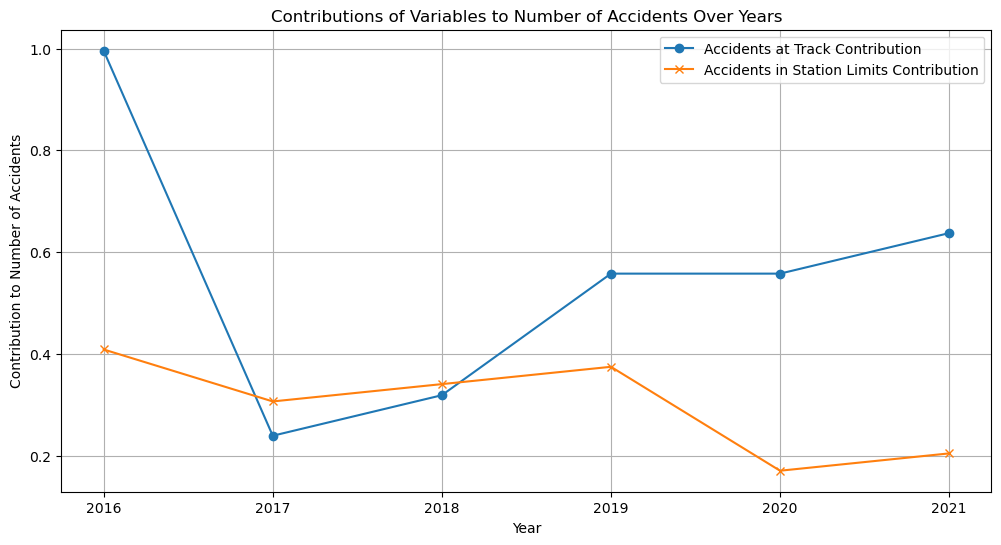

In [11]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Location of Accidents'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
# For example, fill missing values
df = df.fillna(method='ffill')

# Define the dependent (response) and independent (predictor) variables
X = df[['Accidents at Track', 'Accidents in Station Limits']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()
summary = glm_poisson_results.summary()
print(summary)

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")


# Plotting contributions of each variable
plt.figure(figsize=(12, 6))

# Accidents at Track
plt.plot(df['Year'], df['Accidents at Track'] * glm_poisson_results.params['Accidents at Track'], label='Accidents at Track Contribution', marker='o')

# Accidents in Station Limits
plt.plot(df['Year'], df['Accidents in Station Limits'] * glm_poisson_results.params['Accidents in Station Limits'], label='Accidents in Station Limits Contribution', marker='x')

plt.xlabel('Year')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents Over Years')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents_location.png')
plt.show()


                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24.609
Date:                Mon, 05 Aug 2024   Deviance:                    0.0089197
Time:                        16:03:12   Pearson chi2:                  0.00883
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07885
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1639      1.659      1.305      

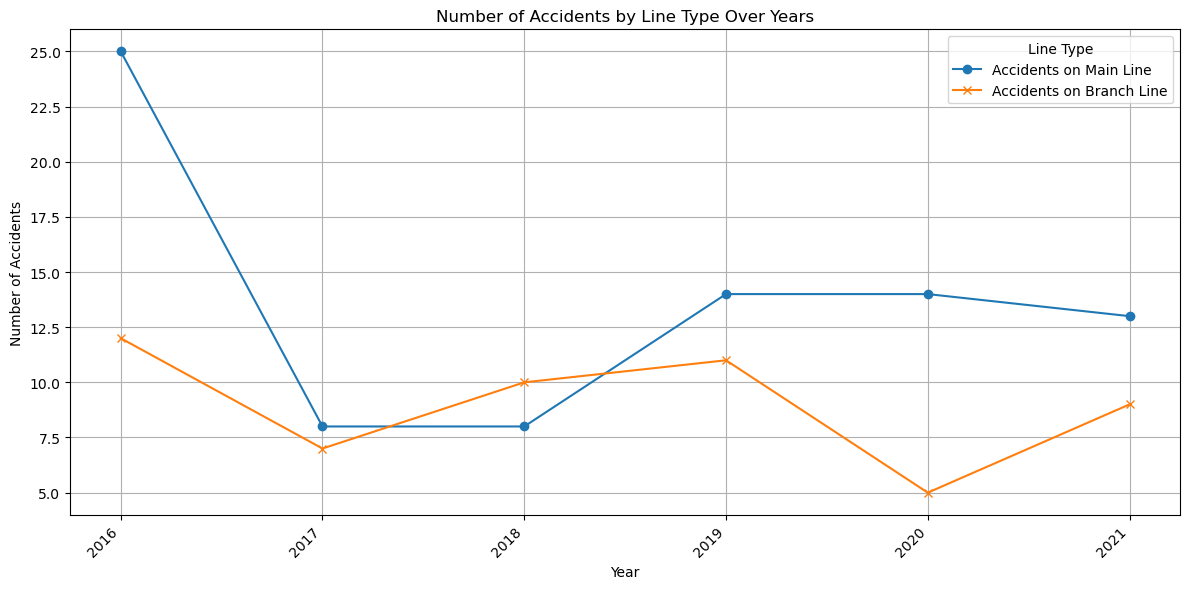

In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Type of Line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Define the dependent (response) variable and independent (predictor) variables
X = df[['Main_Line', 'Branch_Line']]
y = df['No_of_Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the Negative Binomial model
negbinom_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

# Print the summary of the model
print(negbinom_model.summary())

# Deviance and AIC are directly available
print(f"Deviance: {negbinom_model.deviance}")
print(f"AIC: {negbinom_model.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = negbinom_model.null_deviance
pseudo_r_squared = 1 - (negbinom_model.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Plotting the actual values for each line type over years
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Main_Line'], label='Accidents on Main Line', marker='o')
plt.plot(df['Year'], df['Branch_Line'], label='Accidents on Branch Line', marker='x')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Line Type Over Years')
plt.legend(title='Line Type')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot to fit labels
plt.savefig('accidents_by_line_and_year.png')
plt.show()


   Year  No_of_Accidents  Passenager_train  Goods_Train  Other_Train
0  2016               37                28            8            1
1  2017               15                10            5            0
2  2018               18                 8            8            2
3  2019               25                17            8            0
4  2020               19                13            6            0
5  2021               25                10           15            0
GLM Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.891
Date:                Mon

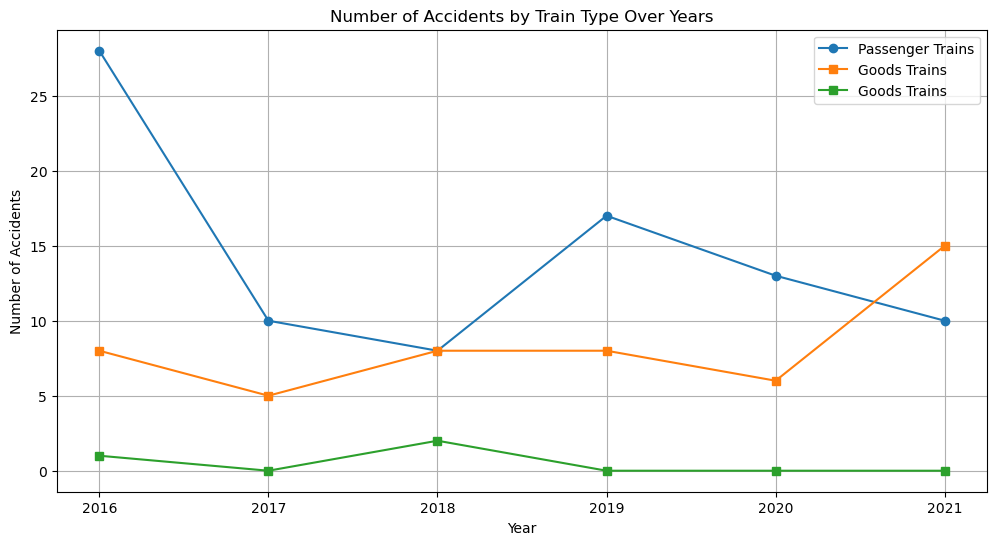

In [19]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Types of Train'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')
print(df)
# Prepare data for GLM
# Define the dependent variable and independent variables
X = df[['Passenager_train', 'Goods_Train','Other_Train']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary
print("GLM Model Summary:")
print(results.summary())

# Print additional metrics
print(f"Deviance: {results.deviance}")
print(f"AIC: {results.aic}")

# Calculate and print Pseudo R-squared (McFadden)
null_model = sm.GLM(y, sm.add_constant(pd.DataFrame({'const': [1] * len(y)})), family=sm.families.Poisson()).fit()
null_deviance = null_model.deviance
pseudo_r_squared = 1 - (results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Plotting the number of accidents by train type over years
plt.figure(figsize=(12, 6))

# Plot number of accidents for Passenger trains
plt.plot(df['Year'], df['Passenager_train'], marker='o', label='Passenger Trains')

# Plot number of accidents for Goods trains
plt.plot(df['Year'], df['Goods_Train'], marker='s', label='Goods Trains')
plt.plot(df['Year'], df['Other_Train'], marker='s', label='Goods Trains')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Train Type Over Years')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'])  # Ensure all years are shown on the x-axis
plt.savefig('accidents_by_train_type_over_years.png')
plt.show()


Index(['Year', 'No_of_Accidents', 'No_Damge_to_PR', 'Cause_Damge_to_PR',
       'Cost_of_Damage'],
      dtype='object')
Model 1: Cost of Damage vs. No of Accidents
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20.912
Date:                Mon, 05 Aug 2024   Deviance:                       12.286
Time:                        16:22:20   Pearson chi2:                     13.0
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02822
Covariance Type:            nonrobust                                         
                     coef    std err         

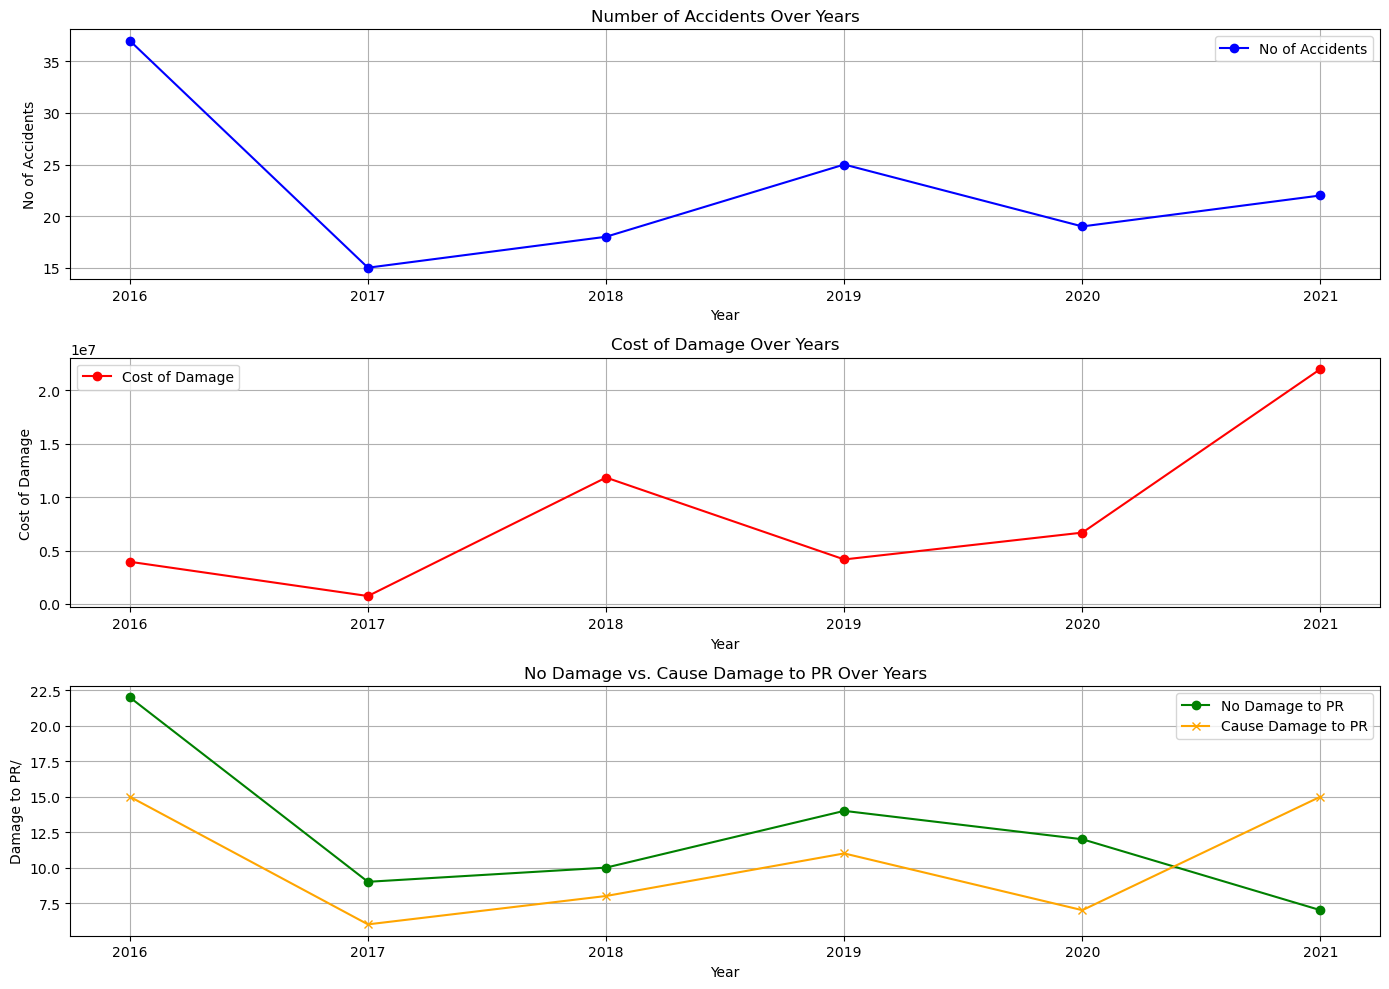

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Cost of Damage'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Verify the updated column names
print(df.columns)  # Should now show the names with underscores

# Define the independent variable (Cost_of_Damage) and dependent variable (No_of_Accidents) for Model 1
X1 = df[['Cost_of_Damage']]
y1 = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X1 = sm.add_constant(X1)

# Fit the GLM model with Poisson family for Model 1
model1 = sm.GLM(y1, X1, family=sm.families.Poisson())
results1 = model1.fit()

# Print the summary of the model
print("Model 1: Cost of Damage vs. No of Accidents")
print(results1.summary())
print("Model 1 Metrics:")
print_metrics(results1)

# Define the independent variables (No_Damge_to_PR and Cause_Damge_to_PR) and dependent variable (No_of_Accidents) for Model 2
X2 = df[['No_Damge_to_PR', 'Cause_Damge_to_PR']]
y2 = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X2 = sm.add_constant(X2)

# Fit the GLM model with Poisson family for Model 2
model2 = sm.GLM(y2, X2, family=sm.families.Poisson())
results2 = model2.fit()

# Print the summary of the model
print("Model 2: No Damage to PR and Cause Damage to PR vs. No of Accidents")
print(results2.summary())

# Extract and print model metrics for each model
def print_metrics(results):
    deviance = results.deviance
    aic = results.aic
    pseudo_r_squared = 1 - (deviance / results.null_deviance)
    print(f"Deviance: {deviance}")
    print(f"AIC: {aic}")
    print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")


print("Model 2 Metrics:")
print_metrics(results2)

# Plotting the graphs

# Plot 1: Number of Accidents and Cost of Damage over Years
plt.figure(figsize=(14, 10))

# Number of Accidents
plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.xlabel('Year')
plt.ylabel('No of Accidents')
plt.title('Number of Accidents Over Years')
plt.grid(True)
plt.legend()

# Cost of Damage
plt.subplot(3, 1, 2)
plt.plot(df['Year'], df['Cost_of_Damage'], marker='o', label='Cost of Damage', color='red')
plt.xlabel('Year')
plt.ylabel('Cost of Damage')
plt.title('Cost of Damage Over Years')
plt.grid(True)
plt.legend()

# Comparisons
plt.subplot(3, 1, 3)
plt.plot(df['Year'], df['No_Damge_to_PR'], marker='o', label='No Damage to PR', color='green')
plt.plot(df['Year'], df['Cause_Damge_to_PR'], marker='x', label='Cause Damage to PR', color='orange')
plt.xlabel('Year')
plt.ylabel('Damage to PR/')
plt.title('No Damage vs. Cause Damage to PR Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('cost_of_damage_analysis.png')
plt.show()


Index(['Sr_No', 'Year', 'No_of_Accidents', 'No_Casualties', 'Casualties',
       'No_of_Deaths', 'No_of_Injuries'],
      dtype='object')

Model Summary for Number of Accidents:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        1
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.784
Date:                Mon, 05 Aug 2024   Deviance:                     0.028553
Time:                        16:57:17   Pearson chi2:                   0.0287
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8740
Covariance Type:            nonrobust                                         
                     coef    std

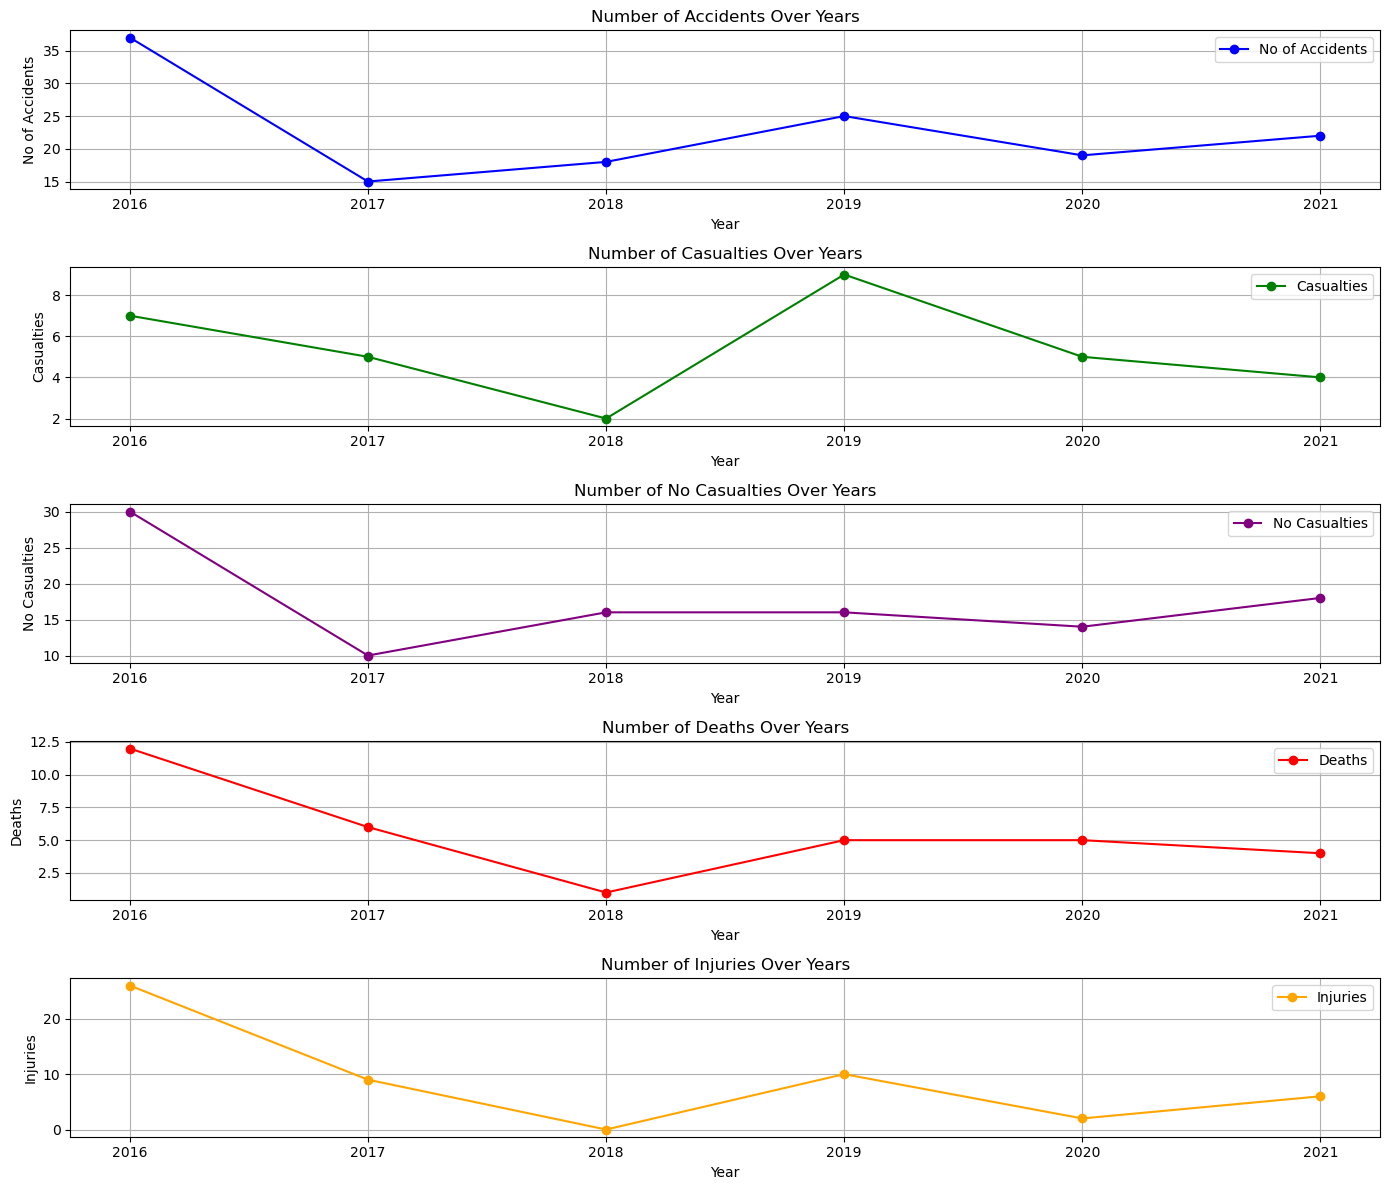

In [30]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Severity'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rename columns to remove extra spaces and make them consistent
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Verify column names after renaming
print(df.columns)

# Define independent variables and dependent variable
X = df[['Casualties', 'No_Casualties', 'No_of_Deaths', 'No_of_Injuries']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit GLM model
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the summary for the model
print("\nModel Summary for Number of Accidents:")
print(model.summary())

print(f"Deviance: {model.deviance}")
print(f"AIC: {model.aic}")
print(f"Log-Likelihood: {model.llf}")

# Plotting the graphs

# Plot 1: Number of Accidents, Casualties, Deaths, and Injuries over Years
plt.figure(figsize=(14, 12))

# Number of Accidents
plt.subplot(5, 1, 1)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.xlabel('Year')
plt.ylabel('No of Accidents')
plt.title('Number of Accidents Over Years')
plt.grid(True)
plt.legend()

# Number of Casualties
plt.subplot(5, 1, 2)
plt.plot(df['Year'], df['Casualties'], marker='o', label='Casualties', color='green')
plt.xlabel('Year')
plt.ylabel('Casualties')
plt.title('Number of Casualties Over Years')
plt.grid(True)
plt.legend()

# No Casualties
plt.subplot(5, 1, 3)
plt.plot(df['Year'], df['No_Casualties'], marker='o', label='No Casualties', color='purple')
plt.xlabel('Year')
plt.ylabel('No Casualties')
plt.title('Number of No Casualties Over Years')
plt.grid(True)
plt.legend()

# Number of Deaths
plt.subplot(5, 1, 4)
plt.plot(df['Year'], df['No_of_Deaths'], marker='o', label='Deaths', color='red')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Number of Deaths Over Years')
plt.grid(True)
plt.legend()

# Number of Injuries
plt.subplot(5, 1, 5)
plt.plot(df['Year'], df['No_of_Injuries'], marker='o', label='Injuries', color='orange')
plt.xlabel('Year')
plt.ylabel('Injuries')
plt.title('Number of Injuries Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('severity_analysis_all.png')
plt.show()



Model Summary for Seasonal Accidents:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        1
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.859
Date:                Mon, 05 Aug 2024   Deviance:                      0.17931
Time:                        16:52:24   Pearson chi2:                    0.179
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8708
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        

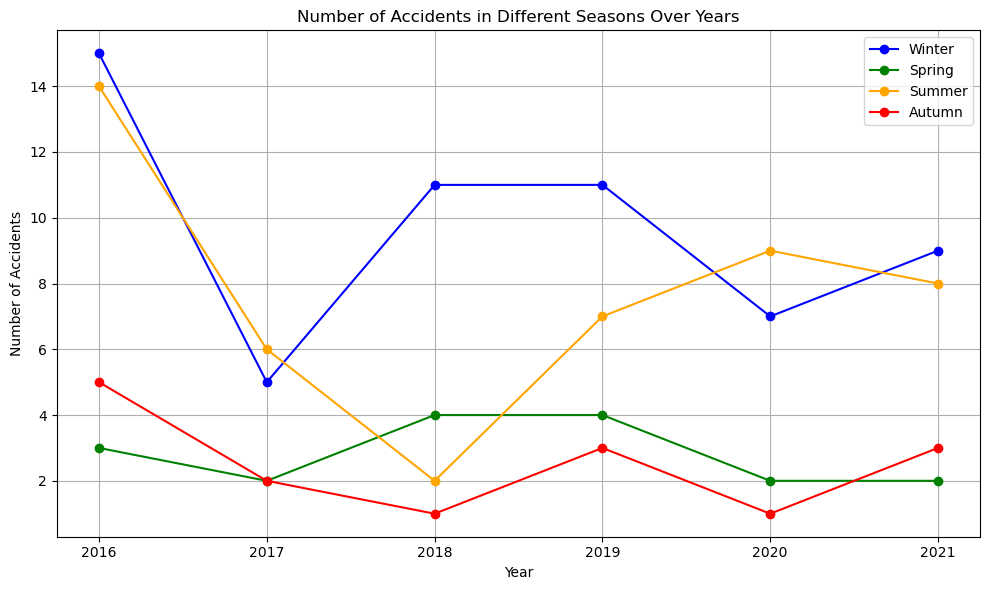

In [28]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Data
data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021],
    'No_of_Accidents': [37, 15, 18, 25, 19, 22],
    'Winter': [15, 5, 11, 11, 7, 9],
    'Spring': [3, 2, 4, 4, 2, 2],
    'Summer': [14, 6, 2, 7, 9, 8],
    'Autumn': [5, 2, 1, 3, 1, 3]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define dependent and independent variables
X = df[['Winter', 'Spring', 'Summer', 'Autumn']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit GLM model
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the summary for the model
print("\nModel Summary for Seasonal Accidents:")
print(model.summary())

# Plotting the graphs

import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021],
    'No_of_Accidents': [37, 15, 18, 25, 19, 22],
    'Winter': [15, 5, 11, 11, 7, 9],
    'Spring': [3, 2, 4, 4, 2, 2],
    'Summer': [14, 6, 2, 7, 9, 8],
    'Autumn': [5, 2, 1, 3, 1, 3]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Winter'], marker='o', label='Winter', color='blue')
plt.plot(df['Year'], df['Spring'], marker='o', label='Spring', color='green')
plt.plot(df['Year'], df['Summer'], marker='o', label='Summer', color='orange')
plt.plot(df['Year'], df['Autumn'], marker='o', label='Autumn', color='red')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents in Different Seasons Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('seasonal_accidents_over_years.png')
plt.show()


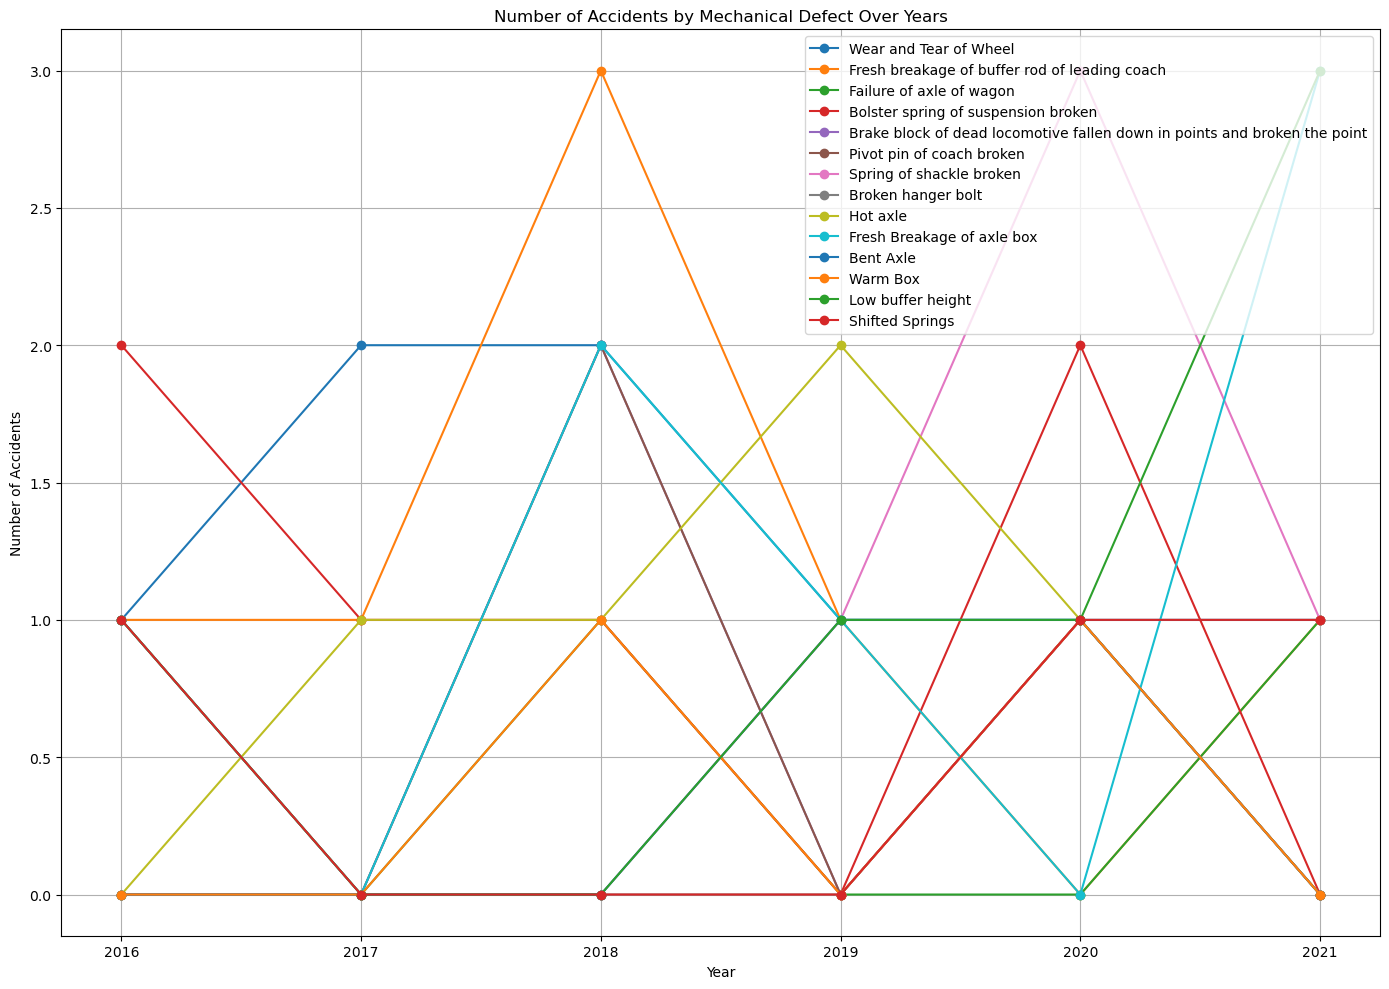

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021],
    'Wear and Tear of Wheel': [1, 2, 2, 1, 1, 1],
    'Fresh breakage of buffer rod of leading coach': [1, 1, 3, 1, 0, 1],
    'Failure of axle of wagon': [1, 0, 1, 0, 0, 1],
    'Bolster spring of suspension broken': [2, 1, 1, 0, 2, 0],
    'Brake block of dead locomotive fallen down in points and broken the point': [0, 0, 2, 0, 1, 0],
    'Pivot pin of coach broken': [0, 0, 2, 0, 1, 0],
    'Spring of shackle broken': [1, 0, 0, 1, 3, 1],
    'Broken hanger bolt': [0, 0, 0, 0, 1, 0],
    'Hot axle': [0, 1, 1, 2, 1, 0],
    'Fresh Breakage of axle box': [1, 0, 2, 1, 0, 3],
    'Bent Axle': [0, 0, 0, 1, 1, 0],
    'Warm Box': [0, 0, 1, 0, 1, 0],
    'Low buffer height': [1, 0, 0, 1, 1, 3],
    'Shifted Springs': [1, 0, 0, 0, 1, 1]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 10))

for column in df.columns[1:]:
    plt.plot(df['Year'], df[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Mechanical Defect Over Years')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.savefig('mechanical_defects_over_years.png')
plt.show()


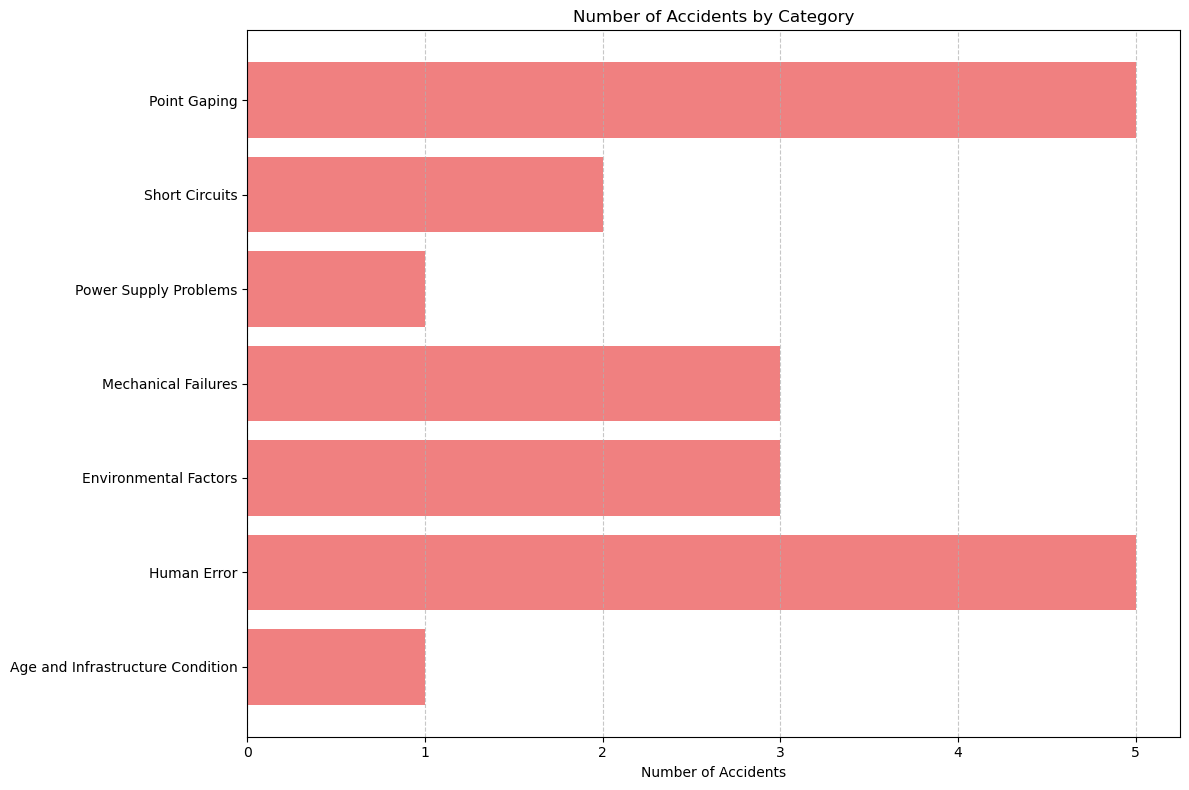

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
data = {
    'Category': [
        'Point Gaping', 'Short Circuits', 'Power Supply Problems', 
        'Mechanical Failures', 'Environmental Factors', 'Human Error', 
        'Age and Infrastructure Condition'
    ],
    'No_of_Accidents': [5, 2, 1, 3, 3, 5, 1]
}

df = pd.DataFrame(data)

# Plot the graph
plt.figure(figsize=(12, 8))
plt.barh(df['Category'], df['No_of_Accidents'], color='lightcoral')
plt.xlabel('Number of Accidents')
plt.title('Number of Accidents by Category')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('accidents_by_category.png')
plt.show()


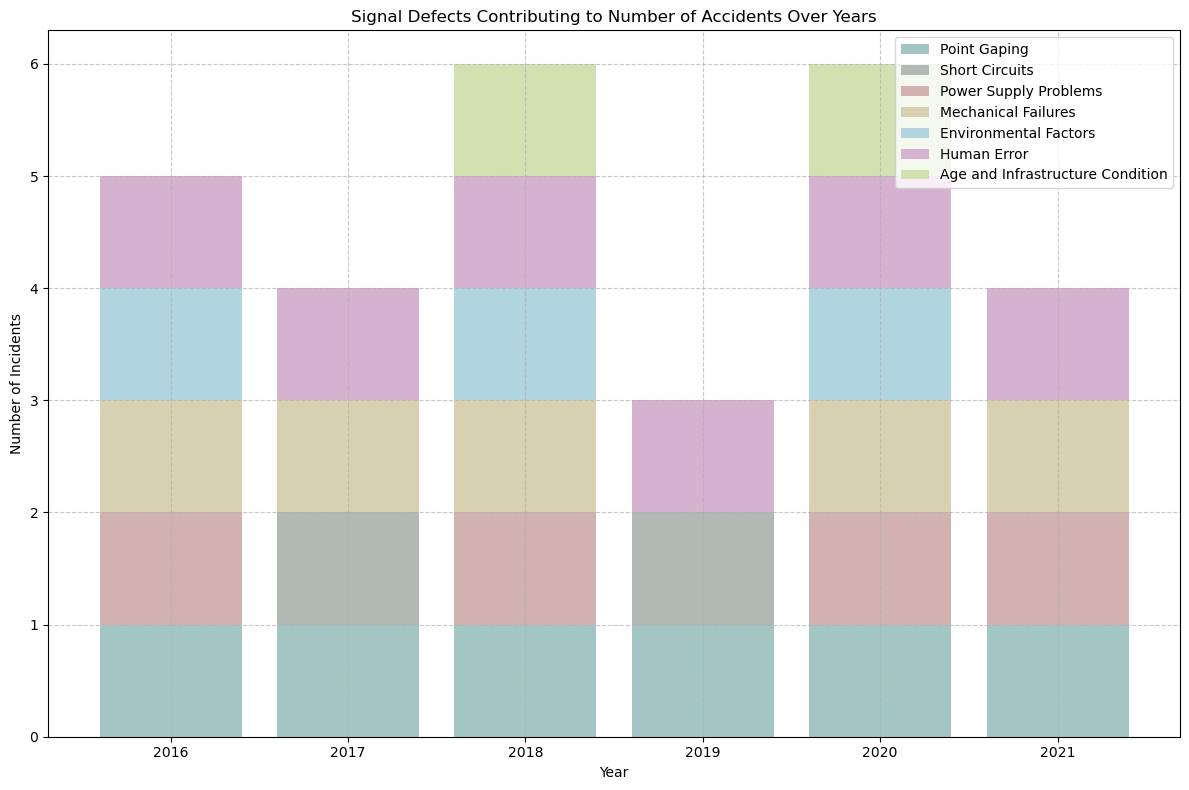

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021],
    'No_of_Accidents': [5, 4, 6, 3, 6, 4],
    'Point_Gaping': [1, 1, 1, 1, 1, 1],
    'Short_Circuits': [0, 1, 0, 1, 0, 0],
    'Power_Supply_Problems': [1, 0, 1, 0, 1, 1],
    'Mechanical_Failures': [1, 1, 1, 0, 1, 1],
    'Environmental_Factors': [1, 0, 1, 0, 1, 0],
    'Human_Error': [1, 1, 1, 1, 1, 1],
    'Age_and_Infrastructure_Condition': [0, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Define a softer color palette
colors = {
    'Point Gaping': '#a3c6c4',  # Light teal
    'Short Circuits': '#b2b8b4',  # Light gray-green
    'Power Supply Problems': '#d1b2b1',  # Light pinkish
    'Mechanical Failures': '#d8d1b1',  # Light beige
    'Environmental Factors': '#b1d4e1',  # Light blue
    'Human Error': '#d6b2d1',  # Light lavender
    'Age and Infrastructure Condition': '#d1e1b2'  # Light yellow-green
}

# Plotting the stacked bar plot with softer colors
plt.figure(figsize=(12, 8))

# Plot each defect type
plt.bar(df['Year'], df['Point_Gaping'], label='Point Gaping', color=colors['Point Gaping'])
plt.bar(df['Year'], df['Short_Circuits'], bottom=df['Point_Gaping'], label='Short Circuits', color=colors['Short Circuits'])
plt.bar(df['Year'], df['Power_Supply_Problems'], bottom=df['Point_Gaping'] + df['Short_Circuits'], label='Power Supply Problems', color=colors['Power Supply Problems'])
plt.bar(df['Year'], df['Mechanical_Failures'], bottom=df['Point_Gaping'] + df['Short_Circuits'] + df['Power_Supply_Problems'], label='Mechanical Failures', color=colors['Mechanical Failures'])
plt.bar(df['Year'], df['Environmental_Factors'], bottom=df['Point_Gaping'] + df['Short_Circuits'] + df['Power_Supply_Problems'] + df['Mechanical_Failures'], label='Environmental Factors', color=colors['Environmental Factors'])
plt.bar(df['Year'], df['Human_Error'], bottom=df['Point_Gaping'] + df['Short_Circuits'] + df['Power_Supply_Problems'] + df['Mechanical_Failures'] + df['Environmental_Factors'], label='Human Error', color=colors['Human Error'])
plt.bar(df['Year'], df['Age_and_Infrastructure_Condition'], bottom=df['Point_Gaping'] + df['Short_Circuits'] + df['Power_Supply_Problems'] + df['Mechanical_Failures'] + df['Environmental_Factors'] + df['Human_Error'], label='Age and Infrastructure Condition', color=colors['Age and Infrastructure Condition'])

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Signal Defects Contributing to Number of Accidents Over Years')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Save and show the plot
plt.tight_layout()
plt.savefig('signal_defects_stacked_bar_plot_subtle_colors.png')
plt.show()


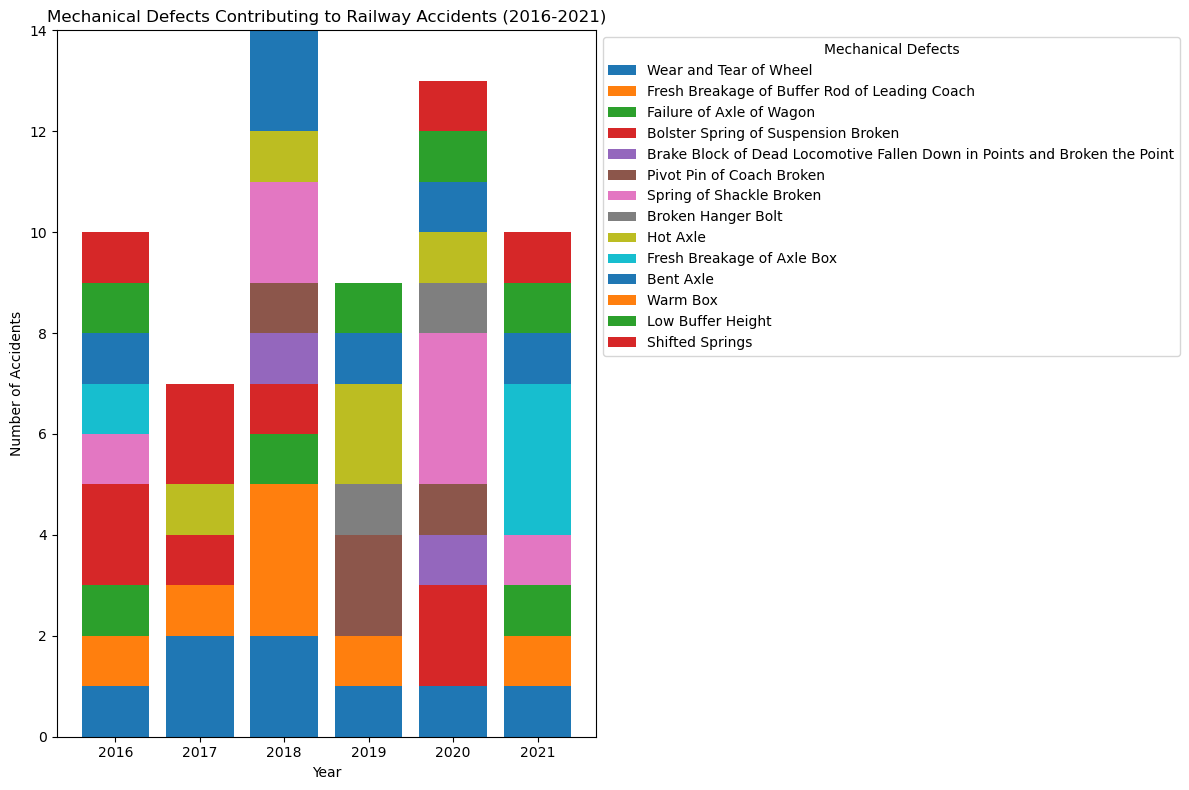

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the mechanical defects data
data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021],
    'Wear and Tear of Wheel': [1, 2, 2, 1, 1, 1],
    'Fresh Breakage of Buffer Rod of Leading Coach': [1, 1, 3, 1, 0, 1],
    'Failure of Axle of Wagon': [1, 0, 1, 0, 0, 1],
    'Bolster Spring of Suspension Broken': [2, 1, 1, 0, 2, 0],
    'Brake Block of Dead Locomotive Fallen Down in Points and Broken the Point': [0, 0, 1, 0, 1, 0],
    'Pivot Pin of Coach Broken': [0, 0, 1, 2, 1, 0],
    'Spring of Shackle Broken': [1, 0, 2, 0, 3, 1],
    'Broken Hanger Bolt': [0, 0, 0, 1, 1, 0],
    'Hot Axle': [0, 1, 1, 2, 1, 0],
    'Fresh Breakage of Axle Box': [1, 0, 0, 0, 0, 3],
    'Bent Axle': [1, 0, 2, 1, 1, 1],
    'Warm Box': [0, 0, 0, 0, 0, 0],
    'Low Buffer Height': [1, 0, 0, 1, 1, 1],
    'Shifted Springs': [1, 2, 0, 0, 1, 1],
    'No of Accidents': [9, 8, 13, 6, 12, 9]
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))

# Create stacked bar plot
bottoms = [0] * len(df['Year'])  # Initialize bottoms for stacking
for column in df.columns[1:-1]:  # Exclude 'Year' and 'No of Accidents'
    plt.bar(df['Year'], df[column], bottom=bottoms, label=column)
    bottoms = [i+j for i, j in zip(bottoms, df[column])]

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Mechanical Defects Contributing to Railway Accidents (2016-2021)')
plt.xticks(df['Year'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Mechanical Defects')
plt.tight_layout()

# Save and show plot
plt.savefig('mechanical_defects_plot.png')
plt.show()
